In [ ]:
"""

在使用之前先安装pip install smote-variants
本文中使用了smote-variants库中的SMOTE和distance_smote两种方法来进行数据集的平衡处理
请大家完成自己算法中的数据集过采样之前和之后的对比

"""

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from smote_variants.visualization import (plot_raw, 
                                          plot_oversampled, 
                                          plot_sampling,
                                          plot_sampling_raw, 
                                          plot_comparison, 
                                          plot_comparison_raw)
import smote_variants as sv

In [79]:
#data = pd.ExcelFile()
data = pd.read_excel('Earthquake Damage Data.xlsx', 'Data')
data.head()
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
y = data.iloc[:,15].values

print (x.shape)
print (y.shape)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# 获取维度参数

(30590, 14)
(30590,)


In [80]:
for i in np.unique(y_train):
    print("class %d - samples: %d" % (i, np.sum(y_train == i)))

class 1 - samples: 22156
class 2 - samples: 99
class 3 - samples: 146
class 4 - samples: 2071


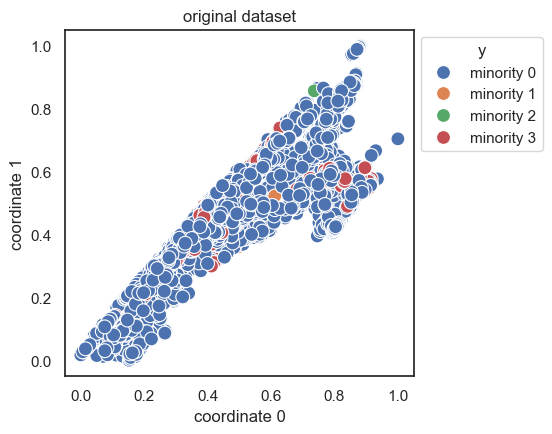

In [81]:
fig = plot_raw(x_train, y_train, "original dataset")

plt.show()

In [82]:
oversampler_0= sv.MulticlassOversampling('SMOTE')
x_train_resampled_0, y_train_resampled_0 = oversampler_0.sample(x_train, y_train)
oversampler_1= sv.MulticlassOversampling('distance_SMOTE')
x_train_resampled_1, y_train_resampled_1 = oversampler_1.sample(x_train, y_train)   

2025-04-19 18:21:16,288:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2025-04-19 18:21:16,292:INFO:MulticlassOversampling: Sampling minority class with label: 4
2025-04-19 18:21:16,293:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2025-04-19 18:21:16,294:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2025-04-19 18:21:16,297:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2025-04-19 18:21:16,325:INFO:SMOTE: simplex sampling with n_dim 2
2025-04-19 18:21:16,360:INFO:MulticlassOversampling: Sampling minority class with label: 3
2025-04-19 18:21:16,363:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.498347144862564, 'n_neighbors': 5, 'nn_params': {}, 'n_

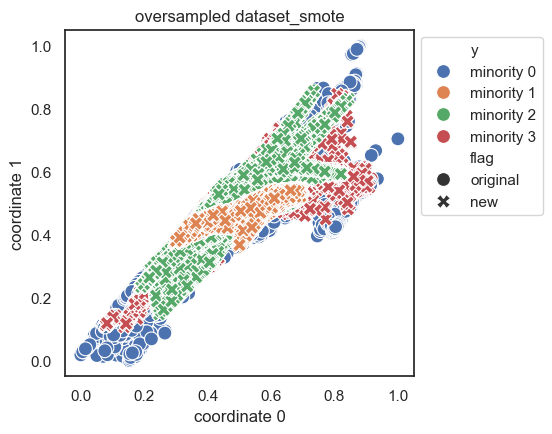

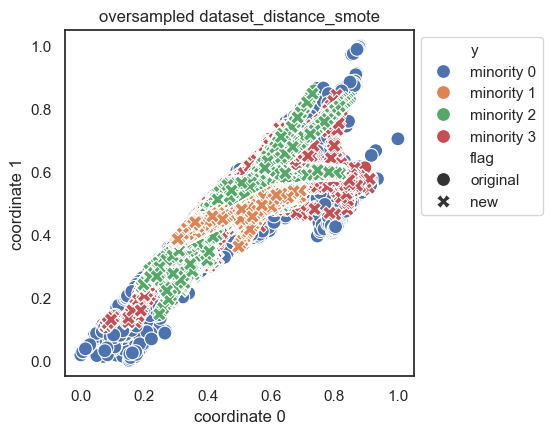

In [83]:
_ = plot_oversampled(x_train, y_train, x_train_resampled_0, y_train_resampled_0, title="oversampled dataset_smote")
_ = plot_oversampled(x_train, y_train, x_train_resampled_1, y_train_resampled_1, title="oversampled dataset_distance_smote")

In [84]:
for i in np.unique(y_train_resampled_0):
    print("class %d - samples: %d" % (i, np.sum( y_train_resampled_0== i)))
    

class 1 - samples: 22156
class 2 - samples: 22156
class 3 - samples: 22156
class 4 - samples: 22156


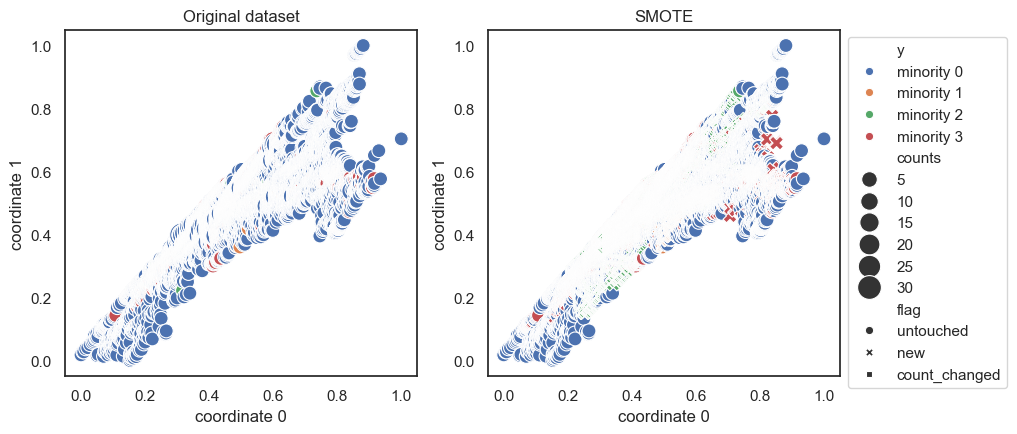

In [85]:
fig = plot_sampling_raw(X=x_train, y=y_train, X_samp=x_train_resampled_0, y_samp=y_train_resampled_0, title="SMOTE")
plt.show()  

class 1 - samples: 22156
class 2 - samples: 22156
class 3 - samples: 22156
class 4 - samples: 22156


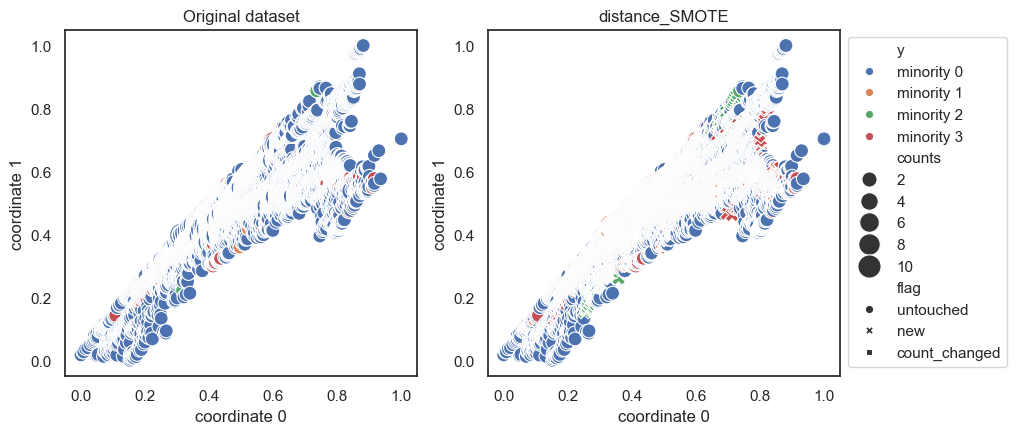

In [86]:
for i in np.unique(y_train_resampled_1):
    print("class %d - samples: %d" % (i, np.sum( y_train_resampled_1== i)))
fig = plot_sampling_raw(X=x_train, y=y_train, X_samp=x_train_resampled_1, y_samp=y_train_resampled_1, title="distance_SMOTE")

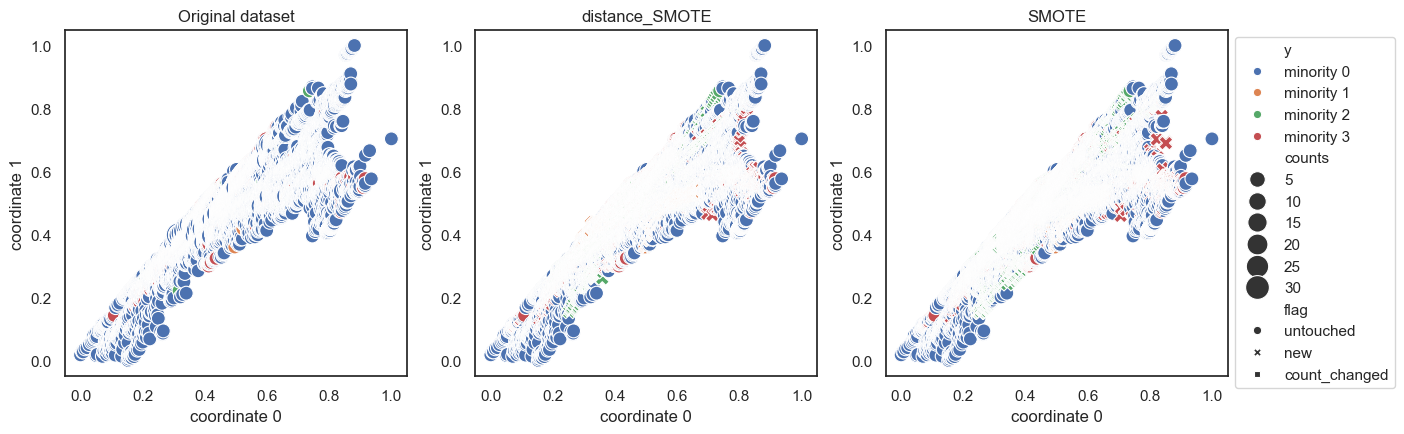

In [87]:
fig = plot_comparison_raw(X=x_train, y=y_train, X_samp0=x_train_resampled_1, y_samp0=y_train_resampled_1, X_samp1=x_train_resampled_0, y_samp1=y_train_resampled_0, title0="distance_SMOTE", title1="SMOTE")